# [Sutton and Barto Notebooks](https://github.com/seungjaeryanlee/sutton-barto-notebooks): Figure 7.2

[ModuAI](https://www.modu.ai)  
Author: Seung Jae (Ryan) Lee  

![Figure 7.2](figure_7_2.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from enum import IntEnum
class Action(IntEnum):
    """
    Possible actions.
    """
    LEFT = -1
    RIGHT = 1

## Environment

In [3]:
class Environment:
    """
    The Random Walk environment specified in Example 6.2 but modified with variable states.
    """
    def __init__(self, n_states=5):
        self.action_space = list(Action)
        self.state_space = [i for i in range(n_states)]
        self.n_states = n_states
        self.state = n_states // 2
        self.true_v = np.array([(i + 1)/(n_states + 1) for i in range(n_states)])

    def step(self, action):
        """
        Take given action and return (observation, reward, done, info) tuple.
        """
        assert action in self.action_space

        if self.state == 0 and action == Action.LEFT:
            return self.state, 0, True, {}
        elif self.state == self.n_states - 1 and action == Action.RIGHT:
            return self.state + action, 1, True, {}
        else:
            self.state += action
            return self.state, 0, False, {}

    def reset(self):
        """
        Resets environment and returns first observation.
        """
        self.state = self.n_states // 2
        return self.state

## Agent(s)

In [15]:
class NStepAgent:
    """
    Agent with random policy and n-step bootstrapping.
    """
    def __init__(self, state_space, action_space, learning_rate=0.1, discount_factor=1, n_step=1):
        self.state_space = state_space
        self.action_space = action_space
        self.lr = learning_rate
        self.discount = discount_factor
        self.v = np.full(len(state_space), 0.5)

    def get_action(self, state):
        """
        Get action via random policy.
        """
        return Action(np.random.choice(self.action_space))

    def update(self, state, action, reward, next_state, done):
        """
        Updates state values with given transition.
        """
        # TODO N Step
        if done:
            self.v[state] += self.lr * (reward - self.v[state])
        else:
            self.v[state] += self.lr * (reward + self.discount * self.v[next_state] - self.v[state])

    def reset(self):
        """
        Resets state values of agent.
        """
        self.v = np.full(len(self.state_space), 0.5)

## Plot

In [16]:
def rms_error(env, agent):
    """
    Calculate the root mean squared error of true state values and agent's state values.
    """
    return np.sum(np.sqrt(np.abs(env.true_v ** 2 - agent.v ** 2)))

In [17]:
def plot(env, agent):
    lrs = np.arange(0.05, 1, 0.05).tolist()
    ys = []
    for lr in lrs:
        total_rms_error = 0
        step_count = 0
        for _ in range(100):
            env.reset()
            agent.reset()
            for _ in range(10):
                state = env.reset()
                done = False
                while not done:
                    action = agent.get_action(state)
                    next_state, reward, done, _ = env.step(action)
                    agent.update(state, action, reward, next_state, done)
                    state = next_state
                    total_rms_error += rms_error(env, agent)
                    step_count += 1

        ys.append(total_rms_error / step_count)

    plt.plot(lrs, ys)

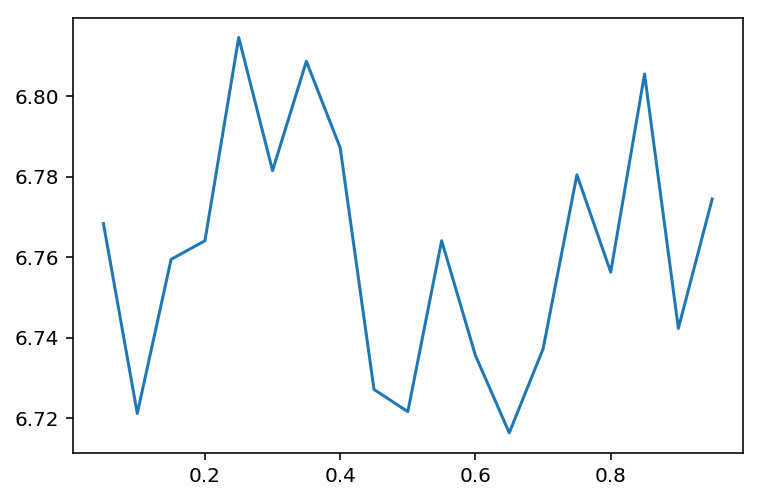

In [18]:
env = Environment(n_states=19)
agent = NStepAgent(env.state_space, env.action_space, learning_rate=lr)
plot(env, agent)